In [1]:
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.vgg19 import preprocess_input

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


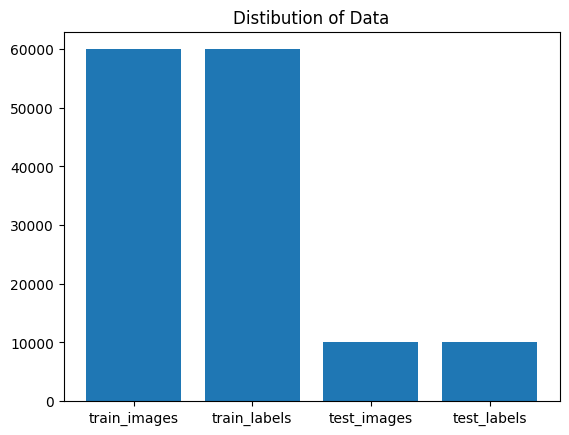

In [4]:
import matplotlib.pyplot as plt

labels = ['train_images', 'train_labels', 'test_images', 'test_labels']
values = [len(train_images), len(train_labels), len(test_images), len(test_labels)]

plt.bar(labels, values)
plt.title('Distibution of Data')
plt.show()

In [5]:
train_images = np.repeat(np.expand_dims(train_images, axis=-1), 3, axis=-1)
test_images = np.repeat(np.expand_dims(test_images, axis=-1), 3, axis=-1)

In [6]:
train_images_resized = np.array([img_to_array(array_to_img(img, scale=False).resize((48, 48))) for img in train_images])
test_images_resized = np.array([img_to_array(array_to_img(img, scale=False).resize((48, 48))) for img in test_images])

In [7]:
# train_images_vgg = preprocess_input(train_images_resized)
# test_images_vgg = preprocess_input(test_images_resized)

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
history = model.fit(train_images_resized, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 94ms/step - accuracy: 0.3688 - loss: 2.2589 - val_accuracy: 0.9506 - val_loss: 0.1863
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 71s 92ms/step - accuracy: 0.9581 - loss: 0.1476 - val_accuracy: 0.9737 - val_loss: 0.0946
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 68s 90ms/step - accuracy: 0.9706 - loss: 0.1091 - val_accuracy: 0.9774 - val_loss: 0.0902
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.9777 - loss: 0.0793 - val_accuracy: 0.9698 - val_loss: 0.1303
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.9778 - loss: 0.0828 - val_accuracy: 0.9837 - val_loss: 0.0639


In [13]:
test_loss, test_acc = model.evaluate(test_images_resized, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss accuracy: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9795 - loss: 0.0704
Test accuracy: 98.44%
Test Loss accuracy: 0.055076636373996735


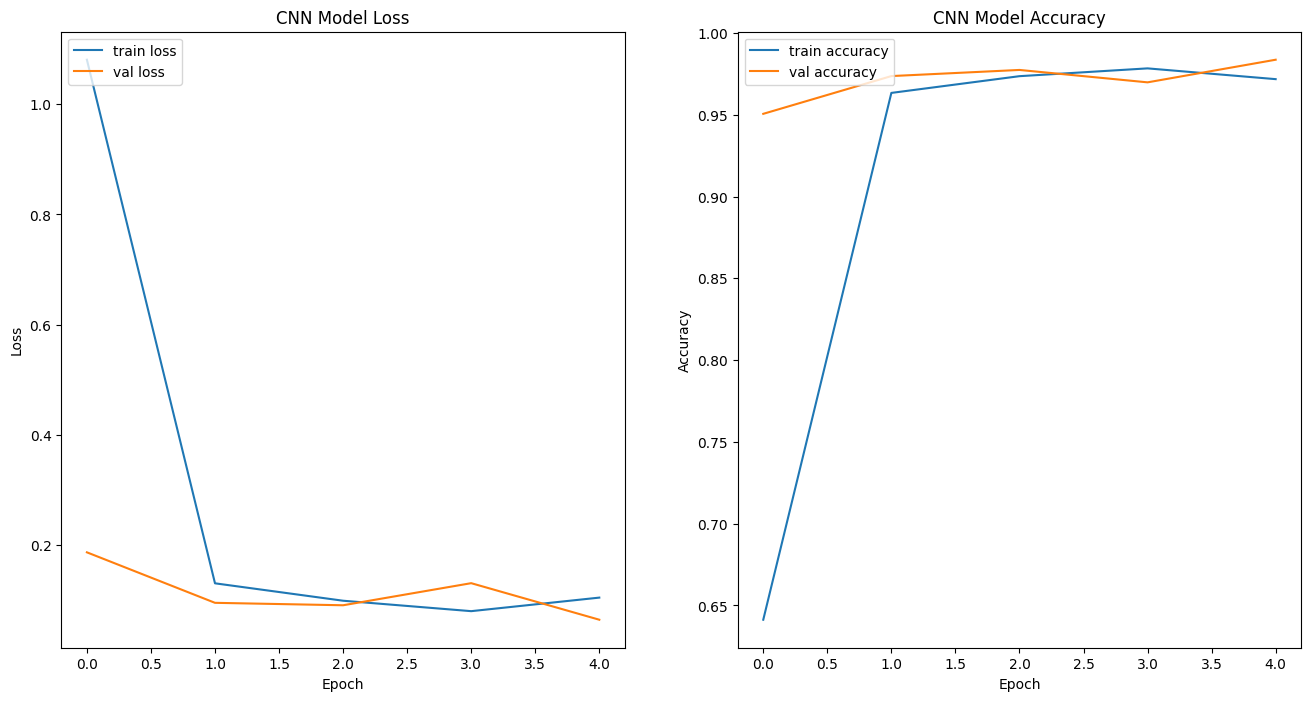

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(history.history['loss'], label='train loss')
ax[0].plot(history.history['val_loss'], label='val loss')
ax[0].set_title('CNN Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

ax[1].plot(history.history['accuracy'], label='train accuracy')
ax[1].plot(history.history['val_accuracy'], label='val accuracy')
ax[1].set_title('CNN Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper left')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step


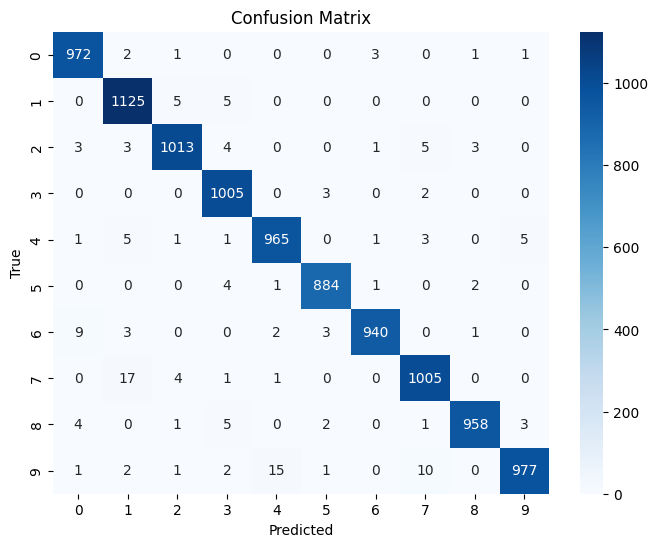

In [15]:
y_pred = model.predict(test_images_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

(48, 48, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


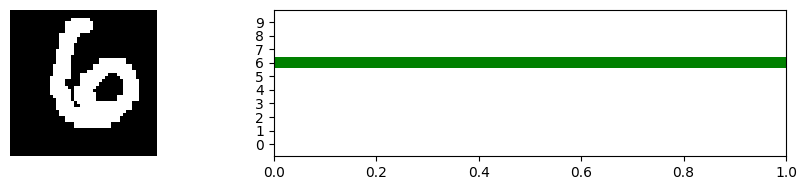

(48, 48, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


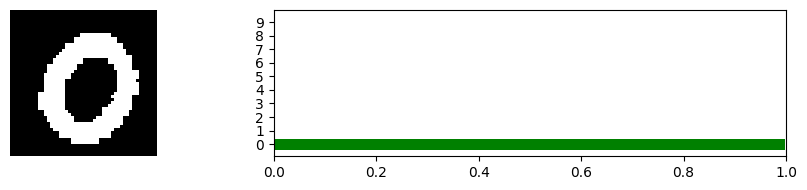

(48, 48, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


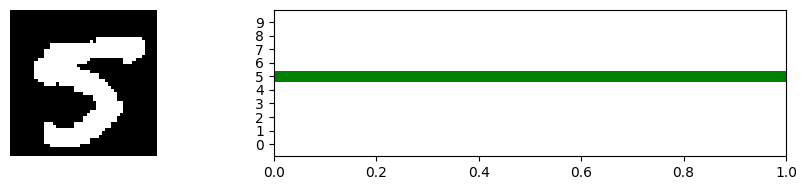

(48, 48, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


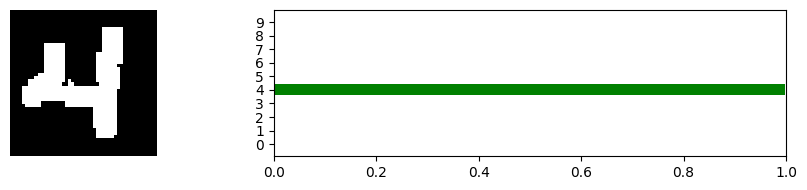

(48, 48, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


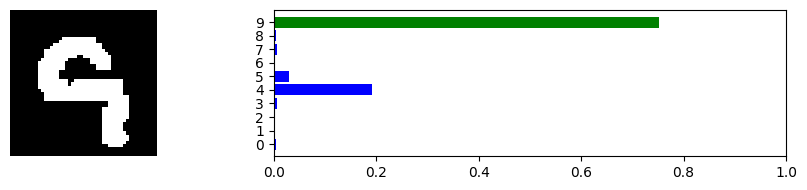

In [16]:
def output_plot(image):

    class_labels = [str(i) for i in range(0,10)]
    fig, axs = plt.subplots(1, 2, figsize=(10, 2))

    predictions = model.predict(image.reshape(1, 48, 48, 3))

    axs[0].imshow(image)
    axs[0].axis('off')
    prediction_values = predictions[0]

    max_index = np.argmax(prediction_values)
    colors = ['green' if i == max_index else 'blue' for i in range(len(class_labels))]

    axs[1].barh(class_labels, prediction_values, color=colors)
    axs[1].set_xlim([0, 1])

    plt.tight_layout()
    plt.show()

for i in test_images_resized[100:105]:
    print(i.shape)
    output_plot(i)